Olá, estudante!

Meu nome é Ramon. Fico feliz em revisar seu projeto. Talvez sejam necessárias várias iterações, mas vamos aprender e crescer juntos na caminhada. Conte comigo! Ao ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser consertado, caso contrário seu projeto **não** será aceito.
</div>

Você pode me responder usando isso:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos seus cliente planos pré-pagos, Surf e Ultimate. O departamento comercial quer saber quais dos planos dão mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma primeira análise dos planos baseados em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam, o número de chamadas que eles fizeram e mensagens que eles enviaram em 2018. O seu trabalho é analisar o comportamento dos clientes e determinar quais planos pré-pagos dão mais receita.

[Nós fornecemos a você alguns comentários para guiar sua linha de raciocínio enquanto você completa esse projeto. Entretanto, certifique-se de remover todos os comentários entre colchetes antes de enviar o projeto.]

[Antes de mergulhar na análise de seus dados, explique por si mesmo o objetivo do projeto e as ações que planeja realizar.]

[Por favor, tenha em mente que estudar, modificar, e analisar dados é um processo iterativo. É normal retornar aos passos anteriores e corrigir/expandir algo para permitir os próximos passos.]

## Inicialização

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
import matplotlib as mt
from math import factorial
import matplotlib.pyplot as plt
from scipy import stats as st




## Carregar dados

In [2]:
# Carregue os arquivos de dados em diferentes DataFrames
try:
    ligações= pd.read_csv("/datasets/megaline_calls.csv") 
    internet= pd.read_csv("/datasets/megaline_internet.csv") 
    mensagens= pd.read_csv("/datasets/megaline_messages.csv") 
    planos= pd.read_csv("/datasets/megaline_plans.csv")
    usuarios= pd.read_csv("/datasets/megaline_users.csv")
except:
    ligações = pd.read_csv("megaline_calls.csv")
    internet= pd.read_csv("megaline_internet.csv")
    mensagens= pd.read_csv("megaline_messages.csv")
    planos= pd.read_csv("megaline_plans.csv")
    usuarios= pd.read_csv("megaline_users.csv")
ligações
internet
mensagens
planos
usuarios

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [3]:
ligações

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Não se usa acentos em nome de variáveis
</div>

In [4]:
internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [5]:
mensagens

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [6]:
usuarios

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


## Preparar os dados

[Os dados para este projeto são divididos em várias tabelas. Explore cada um para obter uma compreensão inicial dos dados. Faça as correções necessárias em cada tabela, se necessário.]

In [7]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos planos
print(ligações)
print(internet)
print(mensagens)
print(planos)
print(usuarios)   

              id  user_id   call_date  duration
0        1000_93     1000  2018-12-27      8.52
1       1000_145     1000  2018-12-27     13.66
2       1000_247     1000  2018-12-27     14.48
3       1000_309     1000  2018-12-28      5.76
4       1000_380     1000  2018-12-30      4.22
...          ...      ...         ...       ...
137730  1499_199     1499  2018-11-21      8.72
137731  1499_200     1499  2018-10-20     10.89
137732  1499_201     1499  2018-09-21      8.12
137733  1499_202     1499  2018-10-10      0.37
137734  1499_203     1499  2018-12-29     13.86

[137735 rows x 4 columns]
              id  user_id session_date  mb_used
0        1000_13     1000   2018-12-29    89.86
1       1000_204     1000   2018-12-31     0.00
2       1000_379     1000   2018-12-28   660.40
3       1000_413     1000   2018-12-26   270.99
4       1000_442     1000   2018-12-27   880.22
...          ...      ...          ...      ...
104820  1499_215     1499   2018-10-20   218.06
104821  1499_

In [8]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos planos
print(ligações.info(),"ligações..............\n")
print(internet.info(),"internet..............\n")
print(mensagens.info(),"mensagem..............\n")
print(planos.info(),"planos................\n")
print(usuarios.info(),"usuarios")   

print("\n",
      internet['mb_used'].describe(),
      internet['session_date'].describe(),
      usuarios['churn_date'].describe())

#mudar call_date para datatime, ver ligações['duration-']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None ligações..............

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None internet..............

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns

In [9]:
# Imprimir uma amostra de dados para os planos
planos
#planos é uma tabela informativa sobre os beneficios de cada plano
#usuarios['churn_date'].unique()
#usuarios['churn_date'].describe()
#churn_date relata que o plano fora cancelado, se ausente relata que o plano estava em uso, temos mais em uso do que cancelados.
ligações
ligações['duration'].describe()
duracao0=(ligações['duration']==0).sum()
duracao0
duracao0/137735 
#19% são ligações com tempo 0, provavelmente são ligações não atendidas, pois é um numero plausível para essa conclusão.
#session_date deve ir para datatime
internet0=(internet['mb_used']==0).sum()
internet0/104825 
#13% são usuários que não consomem internet ou cujos dados forma mal coletados, é mais provavel a primeira opção.
#não identifiquei problema significativo alem do já comentado

0.1311423801574052

In [10]:
internet['session_date']= pd.to_datetime(internet['session_date'], format='%Y-%m-%d' )
ligações['call_date']= pd.to_datetime(ligações['call_date'], format='%Y-%m-%d' )
mensagens['message_date']= pd.to_datetime(mensagens['message_date'], format='%Y-%m-%d' )
usuarios['reg_date']= pd.to_datetime(usuarios['reg_date'], format='%Y-%m-%d' )
#no momento adequado farei o mesmo com mensage_date

In [11]:
internet['session_date']

0        2018-12-29
1        2018-12-31
2        2018-12-28
3        2018-12-26
4        2018-12-27
            ...    
104820   2018-10-20
104821   2018-12-30
104822   2018-09-22
104823   2018-12-07
104824   2018-12-24
Name: session_date, Length: 104825, dtype: datetime64[ns]

In [12]:
ligações['call_date']

0        2018-12-27
1        2018-12-27
2        2018-12-27
3        2018-12-28
4        2018-12-30
            ...    
137730   2018-11-21
137731   2018-10-20
137732   2018-09-21
137733   2018-10-10
137734   2018-12-29
Name: call_date, Length: 137735, dtype: datetime64[ns]

In [13]:
mensagens['message_date']

0       2018-12-27
1       2018-12-31
2       2018-12-31
3       2018-12-27
4       2018-12-26
           ...    
76046   2018-12-24
76047   2018-12-24
76048   2018-12-31
76049   2018-12-24
76050   2018-12-23
Name: message_date, Length: 76051, dtype: datetime64[ns]

In [14]:
usuarios['reg_date']

0     2018-12-24
1     2018-08-13
2     2018-10-21
3     2018-01-28
4     2018-05-23
         ...    
495   2018-09-04
496   2018-02-20
497   2018-12-10
498   2018-02-04
499   2018-05-06
Name: reg_date, Length: 500, dtype: datetime64[ns]

## Planos

[Descreva o que você vê e observa nas informações gerais e na amostra de dados impressa para o preço dos dados acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que possam precisar de mais investigação e alterações? Como isso pode ser corrigido?]



In [15]:
 print(planos.info(),"planos................\n")
planos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None planos................



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Corrigir dados

[Corrija problemas óbvios com os dados de acordo com as observações iniciais.]

sem problema

## Enriqueça os dados

[Adicione fatores adicionais aos dados se você acredita que eles podem ser úteis.]

## Usuários

In [16]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos usuários
print(usuarios.info(),"usuarios")   


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB
None usuarios


In [17]:
#vamos atribuir o valor 1 para o plano ultimate e 0 para surf, para fins de analize futura.
def plano0(linha):
    if linha['plan']== 'ultimate':
        return 1
    else:
        return 0

usuarios['plano01']=usuarios.apply(plano0, axis=1)
usuarios[['plan', 'plano01']]
usuarios['plano01'].sum()/usuarios['plano01'].count()
#32%usam plano ultimate

0.322

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto, mas você pode fazer de forma direta: df['plano01'] = linha['plan'] == 'ultimate'
</div>

Direto seria sem cirar função? nesse caso eu usaria um laço for? 

In [18]:
usuarios['churn_date']= pd.to_datetime(usuarios['churn_date'], format='%Y-%m-%d' )

 

In [19]:
#vamos atribuir o valor 1 para caso o usuario tenha cancelado e 0 se ele não cancelou.

def plano0(linha):
    if pd.isna(linha['churn_date']):
        return 0
    else:
        return 1

usuarios['cancelamento']=usuarios.apply(plano0, axis=1)
usuarios['cancelamento'].sum()/usuarios['cancelamento'].count()

0.068

In [20]:
# Imprimir uma amostra de dados para usuários
print(usuarios.head(10))
print(usuarios.info())   

   user_id first_name  last_name  age                                    city  \
0     1000   Anamaria      Bauer   45   Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28         Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36    Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                           Tulsa, OK MSA   
4     1004    Leonila   Thompson   40         Seattle-Tacoma-Bellevue, WA MSA   
5     1005      Livia    Shields   31     Dallas-Fort Worth-Arlington, TX MSA   
6     1006     Jesusa   Bradford   73  San Francisco-Oakland-Berkeley, CA MSA   
7     1007    Eusebio      Welch   42           Grand Rapids-Kentwood, MI MSA   
8     1008      Emely    Hoffman   53       Orlando-Kissimmee-Sanford, FL MSA   
9     1009      Gerry     Little   19  San Jose-Sunnyvale-Santa Clara, CA MSA   

    reg_date      plan churn_date  plano01  cancelamento  
0 2018-12-24  ultimate        NaT        1       

[Descreva o que você vê e observa nas informações gerais e na amostra de dados impressa para o preço dos dados acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que possam precisar de mais investigação e alterações? Como isso pode ser corrigido?]


### Corrigir dados

[Corrija problemas óbvios com os dados de acordo com as observações iniciais.]

### Enriquecer Dados

[Adicione fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [21]:
#tudo já foi alterado

## Chamadas

In [22]:
ligações
# Imprimir uma amostra de dados para chamadas

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [23]:
# Imprima as informações gerais/resumidas sobre o DataFrame das chamadas
ligações.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


[Descreva o que você vê e observa nas informações gerais e na amostra de dados impressa para o preço dos dados acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que possam precisar de mais investigação e alterações? Como isso pode ser corrigido?]

### Corrigir dados

[Corrija problemas óbvios com os dados de acordo com as observações iniciais.]

In [24]:
ligações['duration'].describe()

count    137735.000000
mean          6.745927
std           5.839241
min           0.000000
25%           1.290000
50%           5.980000
75%          10.690000
max          37.600000
Name: duration, dtype: float64

In [25]:
(ligações['duration']==0).sum()/137735
#conforme já comentado os 26834 valores nulos correspondem a 19%, portanto muito significativo.

0.1948233927469416

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto até aqui
</div>

### Enriquecer dados

[Adicione fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [26]:
def converterid(valor):
    return valor.replace('_', '.')
ligações['id']= ligações['id'].apply(converterid)
ligações['id']=ligações['id'].astype(float)
ligações['id']

0         1000.930
1         1000.145
2         1000.247
3         1000.309
4         1000.380
            ...   
137730    1499.199
137731    1499.200
137732    1499.201
137733    1499.202
137734    1499.203
Name: id, Length: 137735, dtype: float64

In [27]:
ligações.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  float64       
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 4.2 MB


In [28]:
ligações

,id,user_id,call_date,duration
0,1000.930,1000,2018-12-27,8.52
1,1000.145,1000,2018-12-27,13.66
2,1000.247,1000,2018-12-27,14.48
3,1000.309,1000,2018-12-28,5.76
4,1000.380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499.199,1499,2018-11-21,8.72
137731,1499.200,1499,2018-10-20,10.89
137732,1499.201,1499,2018-09-21,8.12
137733,1499.202,1499,2018-10-10,0.37


## Mensagens

In [29]:
# Imprima as informações gerais/resumidas sobre o DataFrame das mensagens
mensagens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [30]:
# Imprima uma amostra dos dados para as mensagens

mensagens

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [31]:
mensagens['ido']= mensagens['id']
mensagens['id']= mensagens['id'].apply(converterid)
mensagens['id']= mensagens['id'].astype(float)
mensagens.info()
mensagens

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  float64       
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   ido           76051 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.3+ MB


,id,user_id,message_date,ido
0,1000.125,1000,2018-12-27,1000_125
1,1000.160,1000,2018-12-31,1000_160
2,1000.223,1000,2018-12-31,1000_223
3,1000.251,1000,2018-12-27,1000_251
4,1000.255,1000,2018-12-26,1000_255
...,...,...,...,...
76046,1497.526,1497,2018-12-24,1497_526
76047,1497.536,1497,2018-12-24,1497_536
76048,1497.547,1497,2018-12-31,1497_547
76049,1497.558,1497,2018-12-24,1497_558


In [32]:
mensagens['message_date']=pd.to_datetime(mensagens['message_date'], format='%Y-%m-%d')
mensagens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  float64       
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   ido           76051 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.3+ MB


In [33]:
mensagens=mensagens.drop('ido', axis=1)
mensagens

,id,user_id,message_date
0,1000.125,1000,2018-12-27
1,1000.160,1000,2018-12-31
2,1000.223,1000,2018-12-31
3,1000.251,1000,2018-12-27
4,1000.255,1000,2018-12-26
...,...,...,...
76046,1497.526,1497,2018-12-24
76047,1497.536,1497,2018-12-24
76048,1497.547,1497,2018-12-31
76049,1497.558,1497,2018-12-24


[Descreva o que você vê e observa nas informações gerais e na amostra de dados impressa para o preço dos dados acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que possam precisar de mais investigação e alterações? Como isso pode ser corrigido?]

### Corrigir dados

[Corrija problemas óbvios com os dados de acordo com as observações iniciais.]

In [34]:
#corrigi colocando id para float e data da mensagem para datetime

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

### Enriquecer dados

[Adicione fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [35]:
mensagens['user_id'].nunique()
#observo que nem todos os usuários possuem dados de mensagens, o que é compreensível

402

In [36]:
mensagens['user_id'].value_counts()

1132    1288
1328    1233
1324    1175
1470    1056
1077     804
        ... 
1481       3
1477       3
1161       2
1323       1
1479       1
Name: user_id, Length: 402, dtype: int64

## Internet

In [37]:
# Imprime as informações gerais/resumidas sobre o DataFrame da Internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [38]:
# Imprime uma amostra de dados para o tráfego da Internet
internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


[Descreva o que você vê e observa nas informações gerais e na amostra de dados impressa para o preço dos dados acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que possam precisar de mais investigação e alterações? Como isso pode ser corrigido?]

### Corrigir dados

[Corrija problemas óbvios com os dados de acordo com as observações iniciais.]


In [39]:
internet['id']=internet['id'].apply(converterid)
internet['id']
internet['id']= internet['id'].astype(float)
print(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  float64       
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 3.2 MB
None


In [40]:
internet

,id,user_id,session_date,mb_used
0,1000.130,1000,2018-12-29,89.86
1,1000.204,1000,2018-12-31,0.00
2,1000.379,1000,2018-12-28,660.40
3,1000.413,1000,2018-12-26,270.99
4,1000.442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499.215,1499,2018-10-20,218.06
104821,1499.216,1499,2018-12-30,304.72
104822,1499.217,1499,2018-09-22,292.75
104823,1499.218,1499,2018-12-07,0.00


In [41]:
(internet['mb_used']==0).sum()
(internet['mb_used']==0).sum()/104825
'''quantidade significativa de 13% não usaram internet,
o que é estranho, pois mesmo estes tem dados de session_date computados, o que será que isso significa? '''

'quantidade significativa de 13% não usaram internet,\no que é estranho, pois mesmo estes tem dados de session_date computados, o que será que isso significa? '

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Boa pergunta
</div>

In [42]:
internetordem=internet.sort_values(by=['user_id','session_date'])
internetordem.head(50)

,id,user_id,session_date,mb_used
3,1000.413,1000,2018-12-26,270.99
4,1000.442,1000,2018-12-27,880.22
2,1000.379,1000,2018-12-28,660.40
0,1000.130,1000,2018-12-29,89.86
1,1000.204,1000,2018-12-31,0.00
151,1001.287,1001,2018-08-15,210.82
59,1001.108,1001,2018-08-16,82.78
196,1001.353,1001,2018-08-16,534.19
70,1001.133,1001,2018-08-17,173.39
224,1001.417,1001,2018-08-17,374.29


Não identifiquei padrão algum, talvez seja porque o usuário ligou a internet mas não usou.
apesar da significancia, se não houve uso, não vejo problema em excluir, mas por precaução colocarei em outra variavel.

In [43]:
internetex= internet.loc[internet['mb_used'] != 0]
internetex.head(50)

,id,user_id,session_date,mb_used
0,1000.130,1000,2018-12-29,89.86
2,1000.379,1000,2018-12-28,660.40
3,1000.413,1000,2018-12-26,270.99
4,1000.442,1000,2018-12-27,880.22
5,1001.000,1001,2018-08-24,284.68
6,1001.300,1001,2018-12-09,656.04
7,1001.400,1001,2018-11-04,16.97
8,1001.100,1001,2018-11-27,135.18
9,1001.150,1001,2018-12-13,761.92
10,1001.160,1001,2018-10-28,501.53


### Enriquecer dados

[Adicione fatores adicionais aos dados se você acredita que eles podem ser úteis.]

já fiz o que eu achava util

## Condições do plano de estudos

[É fundamental entender como os planos funcionam, como os usuários são cobrados com base na assinatura do plano. Assim, sugerimos imprimir as informações do plano para visualizar novamente suas condições.]

In [44]:
# Imprime as condições do plano e certifique-se de que estão claras para você
planos

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Dados agregados por usuário

[Agora, como os dados estão limpos, agregue os dados por usuário por período para ter apenas um registro por usuário por período. Irá facilitar muito a análise posterior.]

In [45]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.
ligações['mes']=ligações['call_date'].dt.month

ligaçõespu=ligações.pivot_table(index=['user_id','mes'],  aggfunc= 'count')
ligações
ligaçõespu= ligaçõespu['id'].reset_index()
ligaçõespu=ligaçõespu.rename(columns = {'id':'ligações'})
#lpu = lpu.dropna(subset=[1])
#lpu[1].isna().count()
ligaçõespu.head(25)

,user_id,mes,ligações
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
5,1001,12,56
6,1002,10,11
7,1002,11,55
8,1002,12,47
9,1003,12,149


In [46]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.
print(ligações)
minutospu=ligações.pivot_table(index=['user_id','mes'], values='duration', aggfunc= 'sum')
print(minutospu)
minutospu=minutospu['duration'].reset_index()
minutospu=minutospu.rename(columns = {'duration':'minutos'})
minutospu


              id  user_id  call_date  duration  mes
0       1000.930     1000 2018-12-27      8.52   12
1       1000.145     1000 2018-12-27     13.66   12
2       1000.247     1000 2018-12-27     14.48   12
3       1000.309     1000 2018-12-28      5.76   12
4       1000.380     1000 2018-12-30      4.22   12
...          ...      ...        ...       ...  ...
137730  1499.199     1499 2018-11-21      8.72   11
137731  1499.200     1499 2018-10-20     10.89   10
137732  1499.201     1499 2018-09-21      8.12    9
137733  1499.202     1499 2018-10-10      0.37   10
137734  1499.203     1499 2018-12-29     13.86   12

[137735 rows x 5 columns]
             duration
user_id mes          
1000    12     116.83
1001    8      171.14
        9      297.69
        10     374.11
        11     404.59
...               ...
1498    12     324.77
1499    9      330.37
        10     363.28
        11     288.56
        12     468.10

[2258 rows x 1 columns]


,user_id,mes,minutos
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59
...,...,...,...
2253,1498,12,324.77
2254,1499,9,330.37
2255,1499,10,363.28
2256,1499,11,288.56


In [47]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.
mensagens['mes']=mensagens['message_date'].dt.month
mensagenspu=mensagens.pivot_table(index= ['user_id', 'mes'], aggfunc= 'count' )
mensagenspu=mensagenspu['id'].reset_index()
mensagenspu=mensagenspu.rename(columns = {'id':'mensagens'})
display(mensagenspu.head(25))
mensagenspu

,user_id,mes,mensagens
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
5,1001,12,44
6,1002,10,15
7,1002,11,32
8,1002,12,41
9,1003,12,50


,user_id,mes,mensagens
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [48]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.
internet['mes']=internet['session_date'].dt.month
internetpu=internet.pivot_table(index= ['user_id','mes'], values='mb_used', aggfunc='sum')
internetpu=internetpu['mb_used'].reset_index()
internetpu=internetpu.rename(columns= {'mb_used': 'megabytes'})
internetpu

,user_id,mes,megabytes
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


[Coloque os dados agregados em um DataFrame para que um registro represente o que um usuário único consumiu em um determinado mês.]

In [49]:
# Junte os dados de chamadas, minutos, mensagens, internet com base em user_id e mês
ligaçõesminutos=ligaçõespu.merge(minutospu, how= 'outer', on= ['user_id','mes'])
lmm=ligaçõesminutos.merge(mensagenspu, how= 'outer', on= ['user_id','mes'] )
lmmi=lmm.merge(internetpu,how= 'outer', on= ['user_id','mes'] )
print(lmmi.head(10))
dfcombinado= lmmi
dfcombinado['GB']= dfcombinado['megabytes']/1024
dfcombinado['GB']= np.ceil(dfcombinado['GB'])
dfcombinado.head(25)
dfcombinado

   user_id  mes  ligações  minutos  mensagens  megabytes
0     1000   12      16.0   116.83       11.0    1901.47
1     1001    8      27.0   171.14       30.0    6919.15
2     1001    9      49.0   297.69       44.0   13314.82
3     1001   10      65.0   374.11       53.0   22330.49
4     1001   11      64.0   404.59       36.0   18504.30
5     1001   12      56.0   392.93       44.0   19369.18
6     1002   10      11.0    54.13       15.0    6552.01
7     1002   11      55.0   359.76       32.0   19345.08
8     1002   12      47.0   363.24       41.0   14396.24
9     1003   12     149.0  1041.00       50.0   27044.14


,user_id,mes,ligações,minutos,mensagens,megabytes,GB
0,1000,12,16.0,116.83,11.0,1901.47,2.0
1,1001,8,27.0,171.14,30.0,6919.15,7.0
2,1001,9,49.0,297.69,44.0,13314.82,14.0
3,1001,10,65.0,374.11,53.0,22330.49,22.0
4,1001,11,64.0,404.59,36.0,18504.30,19.0
...,...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13039.91,13.0
2289,1361,5,NaN,NaN,2.0,1519.69,2.0
2290,1482,10,NaN,NaN,2.0,NaN,NaN
2291,1108,12,NaN,NaN,NaN,233.17,1.0


In [50]:
# Adicione as informações do plano
dfc=dfcombinado
dfc.info()
dfc

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    2293 non-null   int64  
 1   mes        2293 non-null   int64  
 2   ligações   2258 non-null   float64
 3   minutos    2258 non-null   float64
 4   mensagens  1806 non-null   float64
 5   megabytes  2277 non-null   float64
 6   GB         2277 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 143.3 KB


,user_id,mes,ligações,minutos,mensagens,megabytes,GB
0,1000,12,16.0,116.83,11.0,1901.47,2.0
1,1001,8,27.0,171.14,30.0,6919.15,7.0
2,1001,9,49.0,297.69,44.0,13314.82,14.0
3,1001,10,65.0,374.11,53.0,22330.49,22.0
4,1001,11,64.0,404.59,36.0,18504.30,19.0
...,...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13039.91,13.0
2289,1361,5,NaN,NaN,2.0,1519.69,2.0
2290,1482,10,NaN,NaN,2.0,NaN,NaN
2291,1108,12,NaN,NaN,NaN,233.17,1.0


In [51]:
dfc=dfcombinado
dfc['mensagens']=dfc['mensagens'].fillna(0).astype(int)
dfc['megabytes']=dfc['megabytes'].fillna(0)
dfc['GB']=dfc['GB'].fillna(0).astype(int)
dfc['ligações']=dfc['ligações'].fillna(0).astype(int)
dfc['minutos']=dfc['minutos'].fillna(0)
dfc['minutosA']=np.ceil(dfc['minutos']).astype(int) 
dfc.info()
dfclimpa=dfc.drop(['minutos'], axis=1)
dfclimpa

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    2293 non-null   int64  
 1   mes        2293 non-null   int64  
 2   ligações   2293 non-null   int64  
 3   minutos    2293 non-null   float64
 4   mensagens  2293 non-null   int64  
 5   megabytes  2293 non-null   float64
 6   GB         2293 non-null   int64  
 7   minutosA   2293 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 161.2 KB


,user_id,mes,ligações,mensagens,megabytes,GB,minutosA
0,1000,12,16,11,1901.47,2,117
1,1001,8,27,30,6919.15,7,172
2,1001,9,49,44,13314.82,14,298
3,1001,10,65,53,22330.49,22,375
4,1001,11,64,36,18504.30,19,405
...,...,...,...,...,...,...,...
2288,1349,12,0,61,13039.91,13,0
2289,1361,5,0,2,1519.69,2,0
2290,1482,10,0,2,0.00,0,0
2291,1108,12,0,0,233.17,1,0


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Você imputou com 0 valores NA. Temos de fazer isso com bastante cuidado para não introduzir viés
</div>

[A receita mensal para cada usuário (subtraia o limite do pacote grátis do número total de chamadas, mensagens de texto, e dados; multiplique o resultado pelos valores do plano; adicione o preço mensal dependendo do plano de chamada). N.B. Isso pode não ser tão trivial quanto apenas algumas linhas, dadas as condições do plano! Portanto, não há problema em gastar algum tempo nisso.]

In [52]:
# Calcule a receita mensal de cada usuário
plano=usuarios[['user_id','plan']]
plano
dfcplano= dfclimpa.merge(plano, how= 'left', on = 'user_id')
dfcplano


,user_id,mes,ligações,mensagens,megabytes,GB,minutosA,plan
0,1000,12,16,11,1901.47,2,117,ultimate
1,1001,8,27,30,6919.15,7,172,surf
2,1001,9,49,44,13314.82,14,298,surf
3,1001,10,65,53,22330.49,22,375,surf
4,1001,11,64,36,18504.30,19,405,surf
...,...,...,...,...,...,...,...,...
2288,1349,12,0,61,13039.91,13,0,surf
2289,1361,5,0,2,1519.69,2,0,surf
2290,1482,10,0,2,0.00,0,0,ultimate
2291,1108,12,0,0,233.17,1,0,ultimate


In [53]:
dfcplano.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    2293 non-null   int64  
 1   mes        2293 non-null   int64  
 2   ligações   2293 non-null   int64  
 3   mensagens  2293 non-null   int64  
 4   megabytes  2293 non-null   float64
 5   GB         2293 non-null   int64  
 6   minutosA   2293 non-null   int64  
 7   plan       2293 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 161.2+ KB


In [54]:
planos

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [55]:
def excedente(linha):
    vlr=0
    if linha['plan']== 'surf':
            if linha['mensagens']> 50:
                vlr= vlr +(linha['mensagens']-50)*0.03
            if linha['megabytes']>15360:
                vlr=vlr+(linha['GB']-15)*10
            if linha['minutosA']>500:
                vlr=vlr+(linha['minutosA']-500)*0.03
            return vlr +20
    if linha['plan']== 'ultimate':
            if linha['mensagens']> 1000:
                vlr=(linha['mensagens']-1000)*0.01
            if linha['megabytes']>30720:
                vlr=vlr+(linha['GB']-30)*7
            if linha['minutosA']>3000:
                vlr=vlr+(linha['minutosA']-3000)*0.01
            return vlr +70


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto mas você pode usar vlr += x para incrementar de x. 
</div>

In [56]:
dfcplano['vlr_pg']= dfcplano.apply(excedente, axis=1)
dfcplano
     

,user_id,mes,ligações,mensagens,megabytes,GB,minutosA,plan,vlr_pg
0,1000,12,16,11,1901.47,2,117,ultimate,70.00
1,1001,8,27,30,6919.15,7,172,surf,20.00
2,1001,9,49,44,13314.82,14,298,surf,20.00
3,1001,10,65,53,22330.49,22,375,surf,90.09
4,1001,11,64,36,18504.30,19,405,surf,60.00
...,...,...,...,...,...,...,...,...,...
2288,1349,12,0,61,13039.91,13,0,surf,20.33
2289,1361,5,0,2,1519.69,2,0,surf,20.00
2290,1482,10,0,2,0.00,0,0,ultimate,70.00
2291,1108,12,0,0,233.17,1,0,ultimate,70.00


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

## Estudar o comportamento do usuário

### Chamadas

asdfzxcv = dfcplano.sort_values(by='minutosA') 
asdfzxcv.head(50)

In [57]:
dfcplano[dfcplano['minutosA'] == 0].shape[0]

37

mes,1,2,3,4,5,6,7,8,9,10,11,12
surf,193.00,281.333333,311.434783,332.920000,377.532468,407.690722,425.000000,387.660494,391.453608,406.202532,400.067138,447.984277
ultimate,183.75,380.428571,286.166667,317.095238,384.206897,350.361702,404.271186,397.788732,413.779070,425.698113,420.944882,433.549669


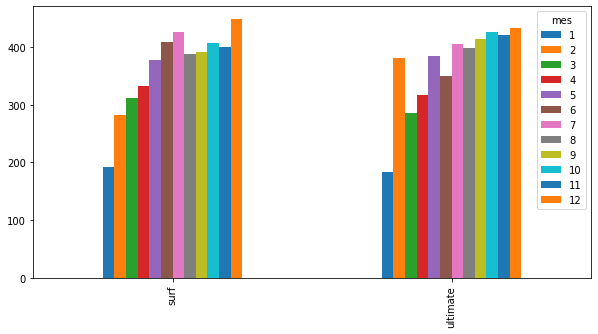

In [58]:
# Compare a duração média das ligações de cada plano para cada mês distinto. Faça um gráfico de barras para visualizá-lo.

duraçao_ligaçao= dfcplano.pivot_table(index='plan',columns= 'mes', values='minutosA', aggfunc='mean')
duraçao_ligaçao=duraçao_ligaçao.reset_index()
duraçao_ligaçao=duraçao_ligaçao.rename(index={0:'surf',1:'ultimate'})
duraçao_ligaçao = duraçao_ligaçao.drop('plan',axis=1)
duraçao_ligaçao.plot(kind='bar', figsize= (10,5))
duraçao_ligaçao

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Gráfico bom
</div>

In [59]:
dfcplano['minutosA'].value_counts()

0       37
248     10
175     10
414     10
477     10
        ..
744      1
742      1
738      1
734      1
1293     1
Name: minutosA, Length: 788, dtype: int64

In [60]:
dfultimate=dfcplano[dfcplano['plan']=='ultimate']
display(dfultimate)
dfsurf=dfcplano[dfcplano['plan']=='surf']
display(dfsurf)
dfcplano

,user_id,mes,ligações,mensagens,megabytes,GB,minutosA,plan,vlr_pg
0,1000,12,16,11,1901.47,2,117,ultimate,70.0
19,1006,11,2,15,2068.37,3,10,ultimate,70.0
20,1006,12,9,139,32118.82,32,55,ultimate,84.0
26,1008,10,71,21,17106.99,17,451,ultimate,70.0
27,1008,11,63,37,23676.72,24,423,ultimate,70.0
...,...,...,...,...,...,...,...,...,...
2284,1204,12,0,78,36730.05,36,0,ultimate,112.0
2285,1224,6,0,5,2966.21,3,0,ultimate,70.0
2290,1482,10,0,2,0.00,0,0,ultimate,70.0
2291,1108,12,0,0,233.17,1,0,ultimate,70.0


,user_id,mes,ligações,mensagens,megabytes,GB,minutosA,plan,vlr_pg
1,1001,8,27,30,6919.15,7,172,surf,20.00
2,1001,9,49,44,13314.82,14,298,surf,20.00
3,1001,10,65,53,22330.49,22,375,surf,90.09
4,1001,11,64,36,18504.30,19,405,surf,60.00
5,1001,12,56,44,19369.18,19,393,surf,60.00
...,...,...,...,...,...,...,...,...,...
2282,1194,12,0,56,31088.49,31,0,surf,180.18
2286,1349,10,0,76,13093.55,13,0,surf,20.78
2287,1349,11,0,72,17128.26,17,0,surf,40.66
2288,1349,12,0,61,13039.91,13,0,surf,20.33


,user_id,mes,ligações,mensagens,megabytes,GB,minutosA,plan,vlr_pg
0,1000,12,16,11,1901.47,2,117,ultimate,70.00
1,1001,8,27,30,6919.15,7,172,surf,20.00
2,1001,9,49,44,13314.82,14,298,surf,20.00
3,1001,10,65,53,22330.49,22,375,surf,90.09
4,1001,11,64,36,18504.30,19,405,surf,60.00
...,...,...,...,...,...,...,...,...,...
2288,1349,12,0,61,13039.91,13,0,surf,20.33
2289,1361,5,0,2,1519.69,2,0,surf,20.00
2290,1482,10,0,2,0.00,0,0,ultimate,70.00
2291,1108,12,0,0,233.17,1,0,ultimate,70.00


<AxesSubplot:ylabel='Frequency'>

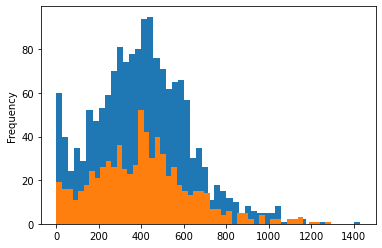

In [61]:
# Compare o número de minutos que os usuários de cada plano requerem a cada mês. Construa um histograma.
dfsurf['minutosA'].plot(kind='hist',bins=50)
dfultimate['minutosA'].plot(kind='hist', bins=50)


#Ao revisor:
porque não consigo dar nome para os eixos?
eis o resto do meu código:
plt.xlabel= 'quantidade'
plt.ylabel= 'minutos'
plt.grind= 'True'
plt.show()

In [62]:
# Calcule a média e a variação da duração mensal das chamadas
duraçao_ligaçao
#não entendi, que variação? Já a média, tá na tabela duraçao_ligaçao

mes,1,2,3,4,5,6,7,8,9,10,11,12
surf,193.00,281.333333,311.434783,332.920000,377.532468,407.690722,425.000000,387.660494,391.453608,406.202532,400.067138,447.984277
ultimate,183.75,380.428571,286.166667,317.095238,384.206897,350.361702,404.271186,397.788732,413.779070,425.698113,420.944882,433.549669


column: Especifica a coluna do DataFrame para a qual o histograma será criado.
bins: Define o número de bins (intervalos) a serem usados no histograma. Pode ser um valor inteiro ou uma sequência de valores que representam os intervalos dos bins.
grid: Se definido como True, exibe uma grade no gráfico do histograma.
xlabel: Define o rótulo do eixo x do gráfico.
ylabel: Define o rótulo do eixo y do gráfico.
color: Define a cor das barras do histograma.
alpha: Define a transparência das barras do histograma (valor entre 0 e 1).
edgecolor: Define a cor das bordas das barras do histograma.
linewidth: Define a largura das bordas das barras do histograma.

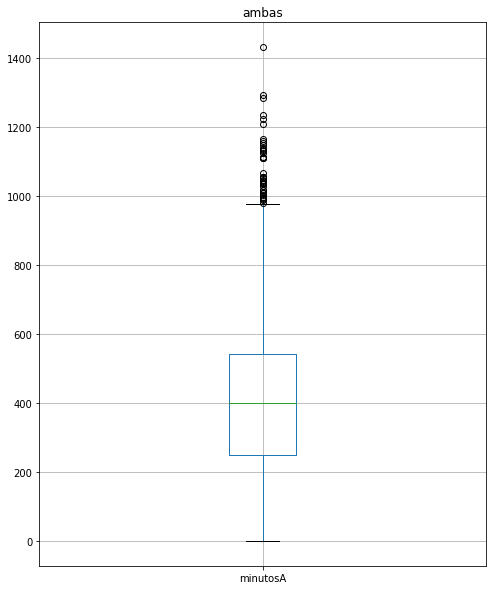

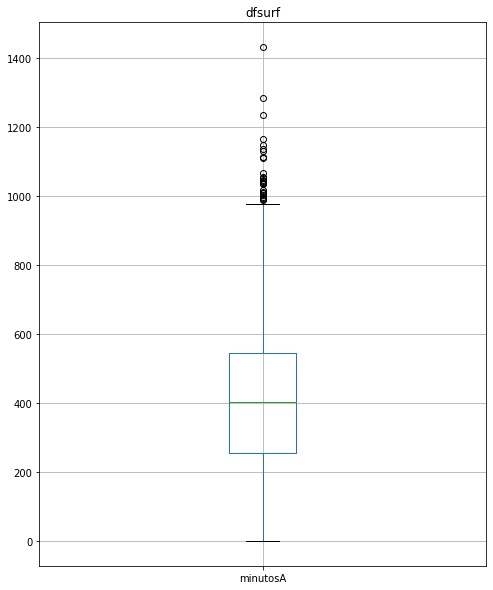

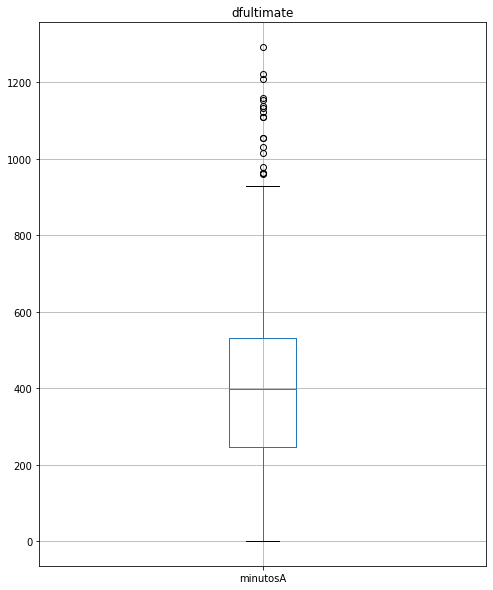

In [63]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas
dfcplano.boxplot('minutosA', figsize=(8,10))
plt.title('ambas')
plt.show()
dfsurf.boxplot('minutosA', figsize=(8,10))
plt.title('dfsurf')
plt.show()
dfultimate.boxplot('minutosA', figsize=(8,10), )
plt.title('dfultimate')
plt.show()

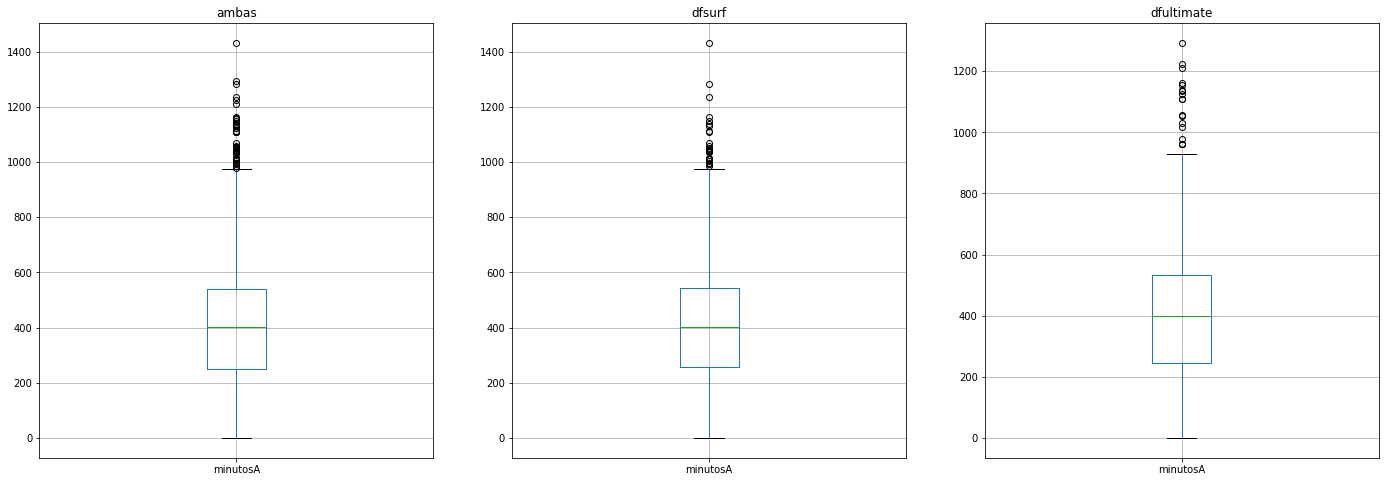

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Plote o boxplot para dfcplano no primeiro subplot
dfcplano.boxplot('minutosA', ax=axes[0])
axes[0].set_title('ambas')

# Plote o boxplot para dfsurf no segundo subplot
dfsurf.boxplot('minutosA', ax=axes[1])
axes[1].set_title('dfsurf')

# Plote o boxplot para dfultimate no terceiro subplot
dfultimate.boxplot('minutosA', ax=axes[2])
axes[2].set_title('dfultimate')

# Exiba os gráficos
plt.show()

[Formule conclusões sobre como os usuários se comportam em termos de chamada. O comportamento deles é diferente entre os planos?]
o comportamento é identico entre os planos

### Mensagens

In [65]:
dfcplano[dfcplano['mensagens'] == 0].shape[0]

487

In [66]:
dfcplano

,user_id,mes,ligações,mensagens,megabytes,GB,minutosA,plan,vlr_pg
0,1000,12,16,11,1901.47,2,117,ultimate,70.00
1,1001,8,27,30,6919.15,7,172,surf,20.00
2,1001,9,49,44,13314.82,14,298,surf,20.00
3,1001,10,65,53,22330.49,22,375,surf,90.09
4,1001,11,64,36,18504.30,19,405,surf,60.00
...,...,...,...,...,...,...,...,...,...
2288,1349,12,0,61,13039.91,13,0,surf,20.33
2289,1361,5,0,2,1519.69,2,0,surf,20.00
2290,1482,10,0,2,0.00,0,0,ultimate,70.00
2291,1108,12,0,0,233.17,1,0,ultimate,70.00


mes,1,2,3,4,5,6,7,8,9,10,11,12
surf,10.5,12.000000,15.26087,17.400000,24.012987,25.298969,27.033058,28.777778,30.762887,33.839662,32.385159,38.600629
ultimate,15.5,21.571429,20.25000,22.047619,32.103448,29.340426,32.830508,38.478873,37.895349,39.443396,38.606299,45.006623


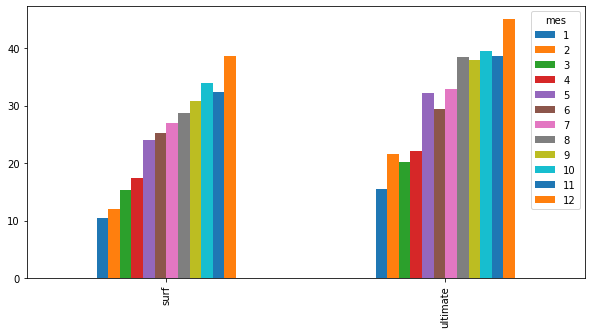

In [67]:
# Compare o número de mensagens que os usuários de cada plano tendem a enviar a cada mês
duraçao_ligaçao= dfcplano.pivot_table(index='plan',columns= 'mes', values='mensagens', aggfunc='mean')
duraçao_ligaçao=duraçao_ligaçao.reset_index()
duraçao_ligaçao=duraçao_ligaçao.rename(index={0:'surf',1:'ultimate'})
duraçao_ligaçao = duraçao_ligaçao.drop('plan',axis=1)
duraçao_ligaçao.plot(kind='bar', figsize= (10,5))
duraçao_ligaçao

plano ultimate envia notavelmente mais mensagens.

In [68]:
df_drop_msg = dfcplano.drop(dfcplano[dfcplano['mensagens'] == 0].index)
df_drop_msg

,user_id,mes,ligações,mensagens,megabytes,GB,minutosA,plan,vlr_pg
0,1000,12,16,11,1901.47,2,117,ultimate,70.00
1,1001,8,27,30,6919.15,7,172,surf,20.00
2,1001,9,49,44,13314.82,14,298,surf,20.00
3,1001,10,65,53,22330.49,22,375,surf,90.09
4,1001,11,64,36,18504.30,19,405,surf,60.00
...,...,...,...,...,...,...,...,...,...
2286,1349,10,0,76,13093.55,13,0,surf,20.78
2287,1349,11,0,72,17128.26,17,0,surf,40.66
2288,1349,12,0,61,13039.91,13,0,surf,20.33
2289,1361,5,0,2,1519.69,2,0,surf,20.00


mes,1,2,3,4,5,6,7,8,9,10,11,12
surf,21.000000,21.600000,21.937500,24.166667,33.017857,33.616438,35.945055,37.596774,39.523179,42.433862,40.553097,48.326772
ultimate,20.666667,25.166667,34.714286,28.937500,44.333333,36.289474,41.212766,47.929825,45.901408,46.977528,47.601942,53.936508


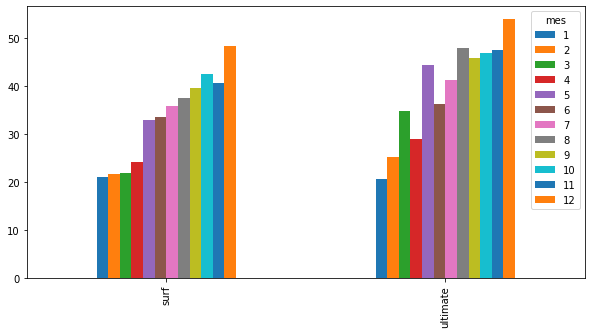

In [69]:
duraçao_ligaçao= df_drop_msg.pivot_table(index='plan',columns= 'mes', values='mensagens', aggfunc='mean')
duraçao_ligaçao=duraçao_ligaçao.reset_index()
duraçao_ligaçao=duraçao_ligaçao.rename(index={0:'surf',1:'ultimate'})
duraçao_ligaçao = duraçao_ligaçao.drop('plan',axis=1)
duraçao_ligaçao.plot(kind='bar', figsize= (10,5))
duraçao_ligaçao

mesmo tirando os meses em que os usuários não enviaram mensagens, o plano ultimate notavelmetne trocou mais mensagens.

In [70]:
dfcplano['GB'].value_counts()
dfcplano.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    2293 non-null   int64  
 1   mes        2293 non-null   int64  
 2   ligações   2293 non-null   int64  
 3   mensagens  2293 non-null   int64  
 4   megabytes  2293 non-null   float64
 5   GB         2293 non-null   int64  
 6   minutosA   2293 non-null   int64  
 7   plan       2293 non-null   object 
 8   vlr_pg     2293 non-null   float64
dtypes: float64(2), int64(6), object(1)
memory usage: 243.7+ KB


mes,1,2,3,4,5,6,7,8,9,10,11,12
surf,8.000000,9.400000,12.625000,11.75,14.410714,15.328767,16.626374,16.870968,16.688742,17.322751,16.305310,18.200787
ultimate,7.333333,16.666667,23.857143,14.50,17.238095,15.184211,16.638298,18.000000,16.464789,17.438202,17.436893,18.492063


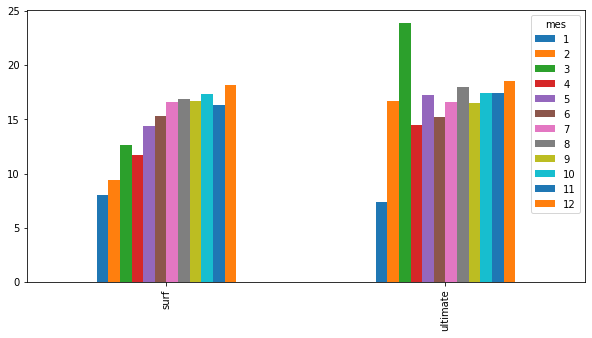

In [71]:
# Compare a quantidade de tráfego de internet consumido pelos usuários por plano
duraçao_ligaçao= df_drop_msg.pivot_table(index='plan',columns= 'mes', values='GB', aggfunc='mean')
duraçao_ligaçao=duraçao_ligaçao.reset_index()
duraçao_ligaçao=duraçao_ligaçao.rename(index={0:'surf',1:'ultimate'})
duraçao_ligaçao = duraçao_ligaçao.drop('plan',axis=1)
duraçao_ligaçao.plot(kind='bar', figsize= (10,5))
duraçao_ligaçao

tirando o mes de janeiro, o plano ultimate usa mais internet, mas não muito mais. A exceção fica por conta dos meses de fevereiro e março, nos quais o uso de internet a mais difere do padrão do restante.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

[Formule conclusões sobre como os usuários se comportam em termos de mensagens. O comportamento deles é diferente entre os planos?]

### Internet

 os usuarios do plano ultimate consomem mais internet e passam mais mensagens em relação aos que usam o plano surf

[Formule conclusões sobre como os usuários tendem a consumir o tráfego da Internet? O comportamento deles é diferente entre os planos?]

## Receita

[Da mesma forma que você estudou o comportamento do usuário, descreva estatisticamente a receita entre os planos.]

In [72]:
receita_ultimate= dfultimate['vlr_pg'].sum()
receita_surf= dfsurf['vlr_pg'].sum()
print("ultimate $:",round(receita_ultimate,2),"\nsurf $:", receita_surf)
media_ultimate= dfultimate['vlr_pg'].mean()
media_surf= dfsurf['vlr_pg'].mean()
print("media ultimate $:",round(media_ultimate,2),"\nmedia surf $:",round(media_surf,2))
mediana_ultimate=dfultimate['vlr_pg'].median()
mediana_surf=dfsurf['vlr_pg'].median()
print("mediana ultimate $:",round(mediana_ultimate,2),"\nmediana surf $:",round(mediana_surf,2))

ultimate $: 52066.0 
surf $: 94902.13
media ultimate $: 72.31 
media surf $: 60.33
mediana ultimate $: 70.0 
mediana surf $: 40.15


In [73]:
varsurf=np.std(dfsurf['vlr_pg'])
varsurf
desviosurf=np.sqrt(varsurf)
desviosurf
print("no plano surf o desvio padrão é:", desviosurf )

no plano surf o desvio padrão é: 7.432786860876484


In [74]:
varultimate=np.std(dfultimate['vlr_pg'])
varultimate
desvioutimate= np.sqrt(varultimate)
desvioutimate
print("no plano ultimate o desvio padrão é:", desvioutimate )

no plano ultimate o desvio padrão é: 3.3744913611904113


In [75]:
print(receita_ultimate/receita_surf)
planos


0.5486283606068694


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


 a empresa fatura aproximadamente duas vezes mais com o plano surf
os clientes do plano surf pagam, na maioria, pelo menos o dobro do mínimo, mas alguns pagam muito a mais,
puxando a média para 60 reais por cliente já os do plano ultimate pagam em média 72 reais e a maioria paga só os 70 reais mesmo.
a receita do plano surf, por usuário tende ser quase a mesma do plano ultimate, sendo que o serviço prestado é menor.  



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

[Formule conclusões sobre como a receita difere entre os planos.]

## Testar hipóteses estatísticas

[Teste a hipótese de que a receita média dos usuários dos planos de chamadas Ultimate e Surf é diferente.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, decida o valor alfa.]

primeiro vou dar uma analizada nos dados separados por ultimate e surf, observando os valores pagos e a incidencia de cada um.

In [76]:
df_testeu=dfultimate
df_testeu
df_testes=dfsurf
df_testes
'''1573 '''

'1573 '

In [77]:
df_testes

,user_id,mes,ligações,mensagens,megabytes,GB,minutosA,plan,vlr_pg
1,1001,8,27,30,6919.15,7,172,surf,20.00
2,1001,9,49,44,13314.82,14,298,surf,20.00
3,1001,10,65,53,22330.49,22,375,surf,90.09
4,1001,11,64,36,18504.30,19,405,surf,60.00
5,1001,12,56,44,19369.18,19,393,surf,60.00
...,...,...,...,...,...,...,...,...,...
2282,1194,12,0,56,31088.49,31,0,surf,180.18
2286,1349,10,0,76,13093.55,13,0,surf,20.78
2287,1349,11,0,72,17128.26,17,0,surf,40.66
2288,1349,12,0,61,13039.91,13,0,surf,20.33


{20.0: 453, 90.09: 2, 60.0: 46, 156.23: 1, 80.0: 51, 110.0: 22, 150.0: 11, 90.0: 33, 40.0: 50, 110.03: 1, 243.60000000000002: 1, 162.4: 1, 70.0: 41, 68.28: 1, 179.81: 1, 115.43: 1, 86.93: 1, 105.91: 1, 125.07: 1, 116.39: 1, 73.57: 1, 30.0: 42, 40.75: 2, 24.77: 1, 72.97: 1, 42.07: 1, 45.07: 1, 36.95: 1, 50.54: 1, 143.32999999999998: 1, 158.7: 1, 23.06: 2, 152.34: 1, 100.0: 28, 82.97: 1, 61.35: 1, 51.59: 1, 20.93: 5, 26.48: 1, 54.65: 1, 83.0: 1, 33.24: 1, 121.08: 1, 42.7: 1, 90.03: 1, 120.0: 15, 131.32: 1, 23.15: 2, 20.3: 1, 20.06: 2, 165.59: 1, 50.0: 55, 20.54: 4, 30.869999999999997: 1, 21.32: 1, 20.72: 4, 70.66: 1, 21.35: 1, 30.84: 2, 21.05: 3, 23.45: 1, 134.23000000000002: 1, 115.03999999999999: 1, 61.74: 1, 128.49: 1, 92.82: 1, 41.019999999999996: 1, 53.18: 2, 45.64: 1, 72.91: 1, 71.68: 1, 20.36: 3, 142.88: 1, 131.35: 1, 142.34: 1, 200.0: 4, 210.0: 6, 20.42: 4, 20.03: 9, 123.18: 1, 102.85: 1, 83.27000000000001: 1, 82.67: 1, 32.46: 1, 89.51: 1, 54.5: 1, 46.45: 1, 24.98: 1, 29.93: 1, 2

<AxesSubplot:>

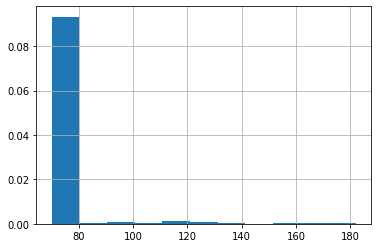

In [78]:
df_testes['vlr_pg'].value_counts()
contador_surf = {}

for value in df_testes['vlr_pg']:
    if value not in contador_surf.keys():
        contador_surf[value] = 1
    else:
        contador_surf[value] += 1

print(contador_surf)
prob_surf = {}
for k in contador_surf:
    prob_surf[k] = contador_surf[k]/1573

for key in prob_surf:
    prob_surf[key] = round(prob_surf[key], 6)

print('              ..................................................................................       \n              .................................................................................       ')

print(prob_surf) 
dfultimate['vlr_pg'].hist(density=True,bins=11) 

In [79]:
dfultimate['vlr_pg'].value_counts()


70.0     679
91.0       6
126.0      6
112.0      5
77.0       5
84.0       4
119.0      4
105.0      4
182.0      2
98.0       1
140.0      1
168.0      1
154.0      1
133.0      1
Name: vlr_pg, dtype: int64

In [80]:
spot_counts = {}

for value in dfultimate['vlr_pg']:
    if value not in spot_counts.keys():
        spot_counts[value] = 1
    else:
        spot_counts[value] += 1

print(spot_counts)


{70.0: 679, 84.0: 4, 112.0: 5, 119.0: 4, 91.0: 6, 126.0: 6, 140.0: 1, 182.0: 2, 154.0: 1, 168.0: 1, 77.0: 5, 105.0: 4, 98.0: 1, 133.0: 1}


In [81]:
spot_probs = {}
for k in spot_counts:
    spot_probs[k] = spot_counts[k]/720
print(spot_probs) 

{70.0: 0.9430555555555555, 84.0: 0.005555555555555556, 112.0: 0.006944444444444444, 119.0: 0.005555555555555556, 91.0: 0.008333333333333333, 126.0: 0.008333333333333333, 140.0: 0.001388888888888889, 182.0: 0.002777777777777778, 154.0: 0.001388888888888889, 168.0: 0.001388888888888889, 77.0: 0.006944444444444444, 105.0: 0.005555555555555556, 98.0: 0.001388888888888889, 133.0: 0.001388888888888889}


<AxesSubplot:>

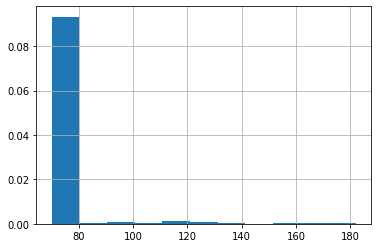

In [82]:
dfultimate['vlr_pg'].hist(density=True,bins=11) 

passada a análise primeira, vamos tirar a média das receitas mensais de cada cliente(ignorando aqueles meses em que não houve qualquer pagamento, pois considero que o usuário não era cliente)

In [83]:
df_testes

,user_id,mes,ligações,mensagens,megabytes,GB,minutosA,plan,vlr_pg
1,1001,8,27,30,6919.15,7,172,surf,20.00
2,1001,9,49,44,13314.82,14,298,surf,20.00
3,1001,10,65,53,22330.49,22,375,surf,90.09
4,1001,11,64,36,18504.30,19,405,surf,60.00
5,1001,12,56,44,19369.18,19,393,surf,60.00
...,...,...,...,...,...,...,...,...,...
2282,1194,12,0,56,31088.49,31,0,surf,180.18
2286,1349,10,0,76,13093.55,13,0,surf,20.78
2287,1349,11,0,72,17128.26,17,0,surf,40.66
2288,1349,12,0,61,13039.91,13,0,surf,20.33


In [84]:
teste_surf = df_testes.pivot_table(index= 'user_id', values= 'vlr_pg', aggfunc='mean')
teste_surf = teste_surf.reset_index()
teste_surf['vlr_pg'] = teste_surf['vlr_pg'].round(2)
teste_surf = teste_surf['vlr_pg'].tolist() 
teste_surf

[50.02,
 33.33,
 156.23,
 76.25,
 40.0,
 155.21,
 108.48,
 41.02,
 20.0,
 28.48,
 50.54,
 107.34,
 84.0,
 27.69,
 86.17,
 45.0,
 20.0,
 55.74,
 20.0,
 20.93,
 33.33,
 41.44,
 20.0,
 33.24,
 40.0,
 20.0,
 66.0,
 61.26,
 89.21,
 20.0,
 20.0,
 20.3,
 92.82,
 55.0,
 68.89,
 29.54,
 63.33,
 22.25,
 91.9,
 43.86,
 47.14,
 67.0,
 50.0,
 28.75,
 30.0,
 34.01,
 144.43,
 24.44,
 20.34,
 74.07,
 20.0,
 44.23,
 136.2,
 32.22,
 47.49,
 50.05,
 89.34,
 20.0,
 40.0,
 55.0,
 92.4,
 20.0,
 99.42,
 30.0,
 48.11,
 147.79,
 41.96,
 66.22,
 24.1,
 54.0,
 27.11,
 84.51,
 25.94,
 84.03,
 30.96,
 61.76,
 46.04,
 20.0,
 63.75,
 40.89,
 22.16,
 86.69,
 275.71,
 65.0,
 89.9,
 100.12,
 95.71,
 43.93,
 31.25,
 72.5,
 63.42,
 20.2,
 66.41,
 30.09,
 52.44,
 39.03,
 44.0,
 54.73,
 47.62,
 198.1,
 36.61,
 20.51,
 37.94,
 39.54,
 31.82,
 68.38,
 21.67,
 68.84,
 36.67,
 82.5,
 23.21,
 20.0,
 60.5,
 103.9,
 74.55,
 135.6,
 38.52,
 66.44,
 64.19,
 100.57,
 75.0,
 53.33,
 28.65,
 23.24,
 38.25,
 58.75,
 53.02,
 62.03,
 57.

In [91]:
df_testeu

,user_id,mes,ligações,mensagens,megabytes,GB,minutosA,plan,vlr_pg
0,1000,12,16,11,1901.47,2,117,ultimate,70.0
19,1006,11,2,15,2068.37,3,10,ultimate,70.0
20,1006,12,9,139,32118.82,32,55,ultimate,84.0
26,1008,10,71,21,17106.99,17,451,ultimate,70.0
27,1008,11,63,37,23676.72,24,423,ultimate,70.0
...,...,...,...,...,...,...,...,...,...
2284,1204,12,0,78,36730.05,36,0,ultimate,112.0
2285,1224,6,0,5,2966.21,3,0,ultimate,70.0
2290,1482,10,0,2,0.00,0,0,ultimate,70.0
2291,1108,12,0,0,233.17,1,0,ultimate,70.0


In [87]:
teste_ult = df_testeu.groupby('user_id').mean()['vlr_pg']
teste_ult = teste_ult.reset_index()
teste_ult['vlr_pg'] = teste_ult['vlr_pg'].round(2)
teste_ult = teste_ult['vlr_pg'].tolist() 

hipotese nula = a receita média dos usuários dos planos de chamadas Ultimate e Surf é semelhante
hipotese alternativa =  a receita média dos usuários dos planos de chamadas Ultimate e Surf é diferente

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [ ]:
alpha=0.03
varianca_surf=np.std(teste_surf)
varianca_ultimate=np.std(teste_ult)

In [ ]:
varsurf=varsurf.round(3)
varultimate=varultimate.round(3)
varianca_surf=varianca_surf.round(3)
varianca_ultimate=varianca_ultimate.round(3)
print("A variança dos dados dos clientes do plano surf é:\n  por mês:", varsurf, ".\n  por usuário:", varianca_surf)
print("A variança dos dados dos clientes do plano ultimate é:\n  por mês:",varultimate, ".\n  por usuário:",varianca_ultimate)

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [ ]:
# Teste as hipóteses

results =  st.ttest_ind( teste_surf, teste_ult, equal_var= False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rejeitamos a hipótese nula, a receita média dos usuários dos planos de chamadas Ultimate e Surf é diferente")
else:
    print("Nós não podemos rejeitar a hipótese nula ") 

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

[Teste a hipótese de que a receita média dos usuários da área de NY-NJ difere da dos usuários das demais regiões.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, decida o valor alfa.]

In [ ]:
usuarios['city'].unique()

In [ ]:
usuarios

In [ ]:
usuarios['city'].unique()

usuarios_de_ny = usuarios[(usuarios['city'].apply(lambda city: 'NY' in city or 'New York' in city))]

usuarios_de_ny

In [ ]:
usuarios_de_ny['user_id']

df_ny = dfcplano.merge(usuarios_de_ny[['user_id']], left_on='user_id', right_on='user_id', how='inner')


mais uma vez devo converter as linhas separadas em meses para a média do usuários

In [ ]:
teste_ny = df_ny.groupby('user_id').mean()['vlr_pg']
teste_ny = df_ny.reset_index()
teste_ny['vlr_pg'] = df_ny['vlr_pg'].round(2)
teste_ny_lista= df_ny['vlr_pg'].tolist()


In [ ]:
not_ny = usuarios[~(usuarios['city'].apply(lambda city: 'NY' in city or 'New York' in city))]

In [ ]:
df_controle_nao_ny = dfcplano[dfcplano['user_id'].isin(not_ny['user_id'])]


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Você pode usar expressões regulares ou algo mais simples:
    idx = ('NY' in df['city']) | ('New York' in df['city']). Peço que refaça conforme a dica deixada.
</div>

ao revisor: 
acho que não entendi, pois para aplicar essas expressões eu teria que usar um apply(lambda x), ou mesmo um str, ou criar uma função, ou um laço for. Eu teria o mesmo resultado de usar o loc, ou diretamente uma comparação dentro do [], com o valor literal de New York-Newark-Jersey City, NY-NJ-PA MSA, conforme eu fiz. Eu verifiquei em unique() que não existe outra expressão para designar a cidade new york.
Não entendo como isso seria mais simples, ou mais efetivo.

Nota 2: acho que entendi! seria porque existem alguns valores de cidade que tem escrito new york cidade e outros que possuem apenas NY com estado e a questão deseja não a cidade, mas o estado NY? devo incluir também nj?

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
Peço desculpas. Eu interpretei errado seu código. Você já está fazendo da forma correta: 
    NY' in city or 'New York' in city
</div>

In [ ]:
controle_lista=df_controle_nao_ny['vlr_pg'].tolist()

In [ ]:

resposta_ny =  st.ttest_ind( teste_ny_lista, controle_lista, equal_var= False)
alpha=0.05
print('p-value: ', resposta_ny.pvalue)

if resposta_ny.pvalue < alpha:
    print("Rejeitamos a hipótese nula, portanto a receita média dos usuários dos planos de chamadas de NY é diferente")
else:
    print("Nós não podemos rejeitar a hipótese nula, portanto a receita pode estatisticamente ser igual ") 

ainda que muito improvavel(uma chanceabaixo de 9%) pode ser que as médias sejam independente da região.

## Conclusão geral

[Liste suas conclusões importantes nessa seção final, certifique-se de que elas cobrem todas as decisões importantes (suposições) que você tomou e que o levaram à maneira como você processou e analisou os dados.]

vejo que a maioria dos clientes usam o plano surf e que a receira é bem maior deste plano.
Muitos clientes deste plano pagam bem mais que o básico, mas ainda abaixo do valor do plano ultimate.
O plano Ultimate em geral representa mais receita por cliente, 
entretanto a quantidade de cliente que optou or este plano é bem menor.

Aparentemente a localizaçao do cliente pode sim afetar o quanto ele paga, 
sendo Nova York uma cidade que apresenta notaveis diferenças, 
mas não o suficiente para afirmar com certeza acima de 95% 
de que foi o fator da cidade que apresentou diferença em relação aos demais, ou se foi coencidência.


<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho. No geral, você respondeu corretamente as questões.

Como pontos fortes do projeto, destaco:
- Código simples e eficiente
- Dominio de apply()
- Bons gráficos
    
Destaco apenas, para próximos projetos:
 - Cuidado com uso de loops (pois são realmente lentos em Python): for value in df_testes['vlr_pg']:
 - Desenvolver melhor as análises, apresentar comentários mais detalhados. Veja que objetivo do noteobok é que você analise para o leitor. Imagine seu chefe lendo o notebook.           

Portanto, sugiro que você corrija os pontos indicados.
    
Conte comigo na sua jornada!
Bom trabalho.
</div>